## Read data

In [5]:
import pandas as pd
import numpy as np

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

## Calculate derivative 

In [6]:
def get_numpy_data(data, features, output):
    data['constant'] = 1
    features = ['constant'] + features   ## why use []
    feature_matrix = data[features]
    feature_matrix = feature_matrix.to_numpy()
    output_array = data[output]
    output_array = output_array.to_numpy()
    return(feature_matrix, output_array)

In [7]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

In [13]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant is True:
        derivative = 2*sum(errors*feature)
    else:
        derivative = 2*sum(errors*feature)+2*l2_penalty*weight
    return(derivative)
            

In [14]:
# test function
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (np.sum(errors*example_features[:,1])*2+20.)
print ('')

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2.)


-56554166815950.0
-56554166815950.0

-22446749330.0
-22446749330.0


## Gradient descent

In [29]:
def ridge_regression_gradient_descent(feature_matrix, output, inital_weights,
                                     setp_size, l2_penalty, max_iterations = 100):
    weights = np.array(initial_weights)
    iteration = 0
    while iteration < max_iterations:
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        for i in range(len(weights)):
            derivative = feature_derivative_ridge(errors, feature_matrix[:, i], 
                                     weights[i], l2_penalty, i==0)
            weights[i] = weights[i] - step_size*derivative
        iteration += 1
        print ('Done with gradient descent at iteration ', iteration)
        print ('Learned weights = ', str(weights))
    return(weights)
            
    

 ## Running a simple regression with L2 penalty

In [18]:
train_data = pd.read_csv('kc_house_train_data.csv/kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv/kc_house_test_data.csv', dtype=dtype_dict)

In [25]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_train_feature_matrix, train_output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [36]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.ones(2)


In [31]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_train_feature_matrix, 
                                                             train_output, inital_weights=initial_weights,
                                                             setp_size=step_size, l2_penalty=0, 
                                                             max_iterations=1000)

Done with gradient descent at iteration  1
Learned weights =  [ 1.01868035 48.15248648]
Done with gradient descent at iteration  2
Learned weights =  [ 1.0339507  86.81965038]
Done with gradient descent at iteration  3
Learned weights =  [  1.04642469 118.52846735]
Done with gradient descent at iteration  4
Learned weights =  [  1.05660556 144.53112627]
Done with gradient descent at iteration  5
Learned weights =  [  1.06490595 165.85447843]
Done with gradient descent at iteration  6
Learned weights =  [  1.07166427 183.34058818]
Done with gradient descent at iteration  7
Learned weights =  [  1.07715802 197.67998621]
Done with gradient descent at iteration  8
Learned weights =  [  1.08161477 209.43893883]
Done with gradient descent at iteration  9
Learned weights =  [  1.08522113 219.08180992]
Done with gradient descent at iteration  10
Learned weights =  [  1.08813013 226.9893988 ]
Done with gradient descent at iteration  11
Learned weights =  [  1.09046727 233.47397806]
Done with gr

Done with gradient descent at iteration  101
Learned weights =  [  1.07814855 263.02386962]
Done with gradient descent at iteration  102
Learned weights =  [  1.07787973 263.02386982]
Done with gradient descent at iteration  103
Learned weights =  [  1.0776109  263.02387001]
Done with gradient descent at iteration  104
Learned weights =  [  1.07734208 263.02387018]
Done with gradient descent at iteration  105
Learned weights =  [  1.07707326 263.02387034]
Done with gradient descent at iteration  106
Learned weights =  [  1.07680444 263.02387049]
Done with gradient descent at iteration  107
Learned weights =  [  1.07653562 263.02387063]
Done with gradient descent at iteration  108
Learned weights =  [  1.0762668  263.02387077]
Done with gradient descent at iteration  109
Learned weights =  [  1.07599798 263.0238709 ]
Done with gradient descent at iteration  110
Learned weights =  [  1.07572916 263.02387102]
Done with gradient descent at iteration  111
Learned weights =  [  1.07546033 26

Done with gradient descent at iteration  203
Learned weights =  [  1.05072878 263.02388116]
Done with gradient descent at iteration  204
Learned weights =  [  1.05045995 263.02388127]
Done with gradient descent at iteration  205
Learned weights =  [  1.05019113 263.02388137]
Done with gradient descent at iteration  206
Learned weights =  [  1.04992231 263.02388148]
Done with gradient descent at iteration  207
Learned weights =  [  1.04965349 263.02388159]
Done with gradient descent at iteration  208
Learned weights =  [  1.04938467 263.0238817 ]
Done with gradient descent at iteration  209
Learned weights =  [  1.04911585 263.02388181]
Done with gradient descent at iteration  210
Learned weights =  [  1.04884703 263.02388191]
Done with gradient descent at iteration  211
Learned weights =  [  1.04857821 263.02388202]
Done with gradient descent at iteration  212
Learned weights =  [  1.04830938 263.02388213]
Done with gradient descent at iteration  213
Learned weights =  [  1.04804056 26

Done with gradient descent at iteration  304
Learned weights =  [  1.02357784 263.02389207]
Done with gradient descent at iteration  305
Learned weights =  [  1.02330902 263.02389218]
Done with gradient descent at iteration  306
Learned weights =  [  1.0230402  263.02389229]
Done with gradient descent at iteration  307
Learned weights =  [  1.02277138 263.02389239]
Done with gradient descent at iteration  308
Learned weights =  [  1.02250256 263.0238925 ]
Done with gradient descent at iteration  309
Learned weights =  [  1.02223373 263.02389261]
Done with gradient descent at iteration  310
Learned weights =  [  1.02196491 263.02389272]
Done with gradient descent at iteration  311
Learned weights =  [  1.02169609 263.02389283]
Done with gradient descent at iteration  312
Learned weights =  [  1.02142727 263.02389293]
Done with gradient descent at iteration  313
Learned weights =  [  1.02115845 263.02389304]
Done with gradient descent at iteration  314
Learned weights =  [  1.02088963 26

Done with gradient descent at iteration  397
Learned weights =  [  0.99857749 263.02390212]
Done with gradient descent at iteration  398
Learned weights =  [  0.99830867 263.02390222]
Done with gradient descent at iteration  399
Learned weights =  [  0.99803985 263.02390233]
Done with gradient descent at iteration  400
Learned weights =  [  0.99777102 263.02390244]
Done with gradient descent at iteration  401
Learned weights =  [  0.9975022  263.02390255]
Done with gradient descent at iteration  402
Learned weights =  [  0.99723338 263.02390266]
Done with gradient descent at iteration  403
Learned weights =  [  0.99696456 263.02390276]
Done with gradient descent at iteration  404
Learned weights =  [  0.99669574 263.02390287]
Done with gradient descent at iteration  405
Learned weights =  [  0.99642692 263.02390298]
Done with gradient descent at iteration  406
Learned weights =  [  0.9961581  263.02390309]
Done with gradient descent at iteration  407
Learned weights =  [  0.99588928 26

Done with gradient descent at iteration  495
Learned weights =  [  0.97223304 263.0239127 ]
Done with gradient descent at iteration  496
Learned weights =  [  0.97196422 263.02391281]
Done with gradient descent at iteration  497
Learned weights =  [  0.9716954  263.02391292]
Done with gradient descent at iteration  498
Learned weights =  [  0.97142658 263.02391303]
Done with gradient descent at iteration  499
Learned weights =  [  0.97115776 263.02391314]
Done with gradient descent at iteration  500
Learned weights =  [  0.97088894 263.02391324]
Done with gradient descent at iteration  501
Learned weights =  [  0.97062012 263.02391335]
Done with gradient descent at iteration  502
Learned weights =  [  0.9703513  263.02391346]
Done with gradient descent at iteration  503
Learned weights =  [  0.97008248 263.02391357]
Done with gradient descent at iteration  504
Learned weights =  [  0.96981366 263.02391368]
Done with gradient descent at iteration  505
Learned weights =  [  0.96954484 26

Done with gradient descent at iteration  598
Learned weights =  [  0.94454451 263.02392383]
Done with gradient descent at iteration  599
Learned weights =  [  0.94427569 263.02392394]
Done with gradient descent at iteration  600
Learned weights =  [  0.94400687 263.02392405]
Done with gradient descent at iteration  601
Learned weights =  [  0.94373805 263.02392416]
Done with gradient descent at iteration  602
Learned weights =  [  0.94346923 263.02392426]
Done with gradient descent at iteration  603
Learned weights =  [  0.94320041 263.02392437]
Done with gradient descent at iteration  604
Learned weights =  [  0.94293159 263.02392448]
Done with gradient descent at iteration  605
Learned weights =  [  0.94266277 263.02392459]
Done with gradient descent at iteration  606
Learned weights =  [  0.94239395 263.0239247 ]
Done with gradient descent at iteration  607
Learned weights =  [  0.94212513 263.0239248 ]
Done with gradient descent at iteration  608
Learned weights =  [  0.94185631 26

Done with gradient descent at iteration  699
Learned weights =  [  0.91739364 263.02393474]
Done with gradient descent at iteration  700
Learned weights =  [  0.91712482 263.02393485]
Done with gradient descent at iteration  701
Learned weights =  [  0.916856   263.02393496]
Done with gradient descent at iteration  702
Learned weights =  [  0.91658718 263.02393507]
Done with gradient descent at iteration  703
Learned weights =  [  0.91631836 263.02393517]
Done with gradient descent at iteration  704
Learned weights =  [  0.91604954 263.02393528]
Done with gradient descent at iteration  705
Learned weights =  [  0.91578072 263.02393539]
Done with gradient descent at iteration  706
Learned weights =  [  0.9155119 263.0239355]
Done with gradient descent at iteration  707
Learned weights =  [  0.91524308 263.02393561]
Done with gradient descent at iteration  708
Learned weights =  [  0.91497426 263.02393571]
Done with gradient descent at iteration  709
Learned weights =  [  0.91470543 263.

Done with gradient descent at iteration  805
Learned weights =  [  0.88889868 263.02394619]
Done with gradient descent at iteration  806
Learned weights =  [  0.88862986 263.0239463 ]
Done with gradient descent at iteration  807
Learned weights =  [  0.88836104 263.02394641]
Done with gradient descent at iteration  808
Learned weights =  [  0.88809222 263.02394652]
Done with gradient descent at iteration  809
Learned weights =  [  0.8878234  263.02394663]
Done with gradient descent at iteration  810
Learned weights =  [  0.88755458 263.02394673]
Done with gradient descent at iteration  811
Learned weights =  [  0.88728576 263.02394684]
Done with gradient descent at iteration  812
Learned weights =  [  0.88701694 263.02394695]
Done with gradient descent at iteration  813
Learned weights =  [  0.88674812 263.02394706]
Done with gradient descent at iteration  814
Learned weights =  [  0.8864793  263.02394717]
Done with gradient descent at iteration  815
Learned weights =  [  0.88621048 26

Done with gradient descent at iteration  903
Learned weights =  [  0.8625543  263.02395678]
Done with gradient descent at iteration  904
Learned weights =  [  0.86228548 263.02395689]
Done with gradient descent at iteration  905
Learned weights =  [  0.86201666 263.023957  ]
Done with gradient descent at iteration  906
Learned weights =  [  0.86174784 263.0239571 ]
Done with gradient descent at iteration  907
Learned weights =  [  0.86147902 263.02395721]
Done with gradient descent at iteration  908
Learned weights =  [  0.8612102  263.02395732]
Done with gradient descent at iteration  909
Learned weights =  [  0.86094138 263.02395743]
Done with gradient descent at iteration  910
Learned weights =  [  0.86067256 263.02395754]
Done with gradient descent at iteration  911
Learned weights =  [  0.86040374 263.02395764]
Done with gradient descent at iteration  912
Learned weights =  [  0.86013492 263.02395775]
Done with gradient descent at iteration  913
Learned weights =  [  0.8598661  26

Done with gradient descent at iteration  999
Learned weights =  [  0.83674757 263.02396715]
Done with gradient descent at iteration  1000
Learned weights =  [  0.83647875 263.02396726]


In [32]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_train_feature_matrix, 
                                                             train_output, inital_weights=initial_weights,
                                                             setp_size=step_size, l2_penalty=1e11, 
                                                             max_iterations=1000)

Done with gradient descent at iteration  1
Learned weights =  [ 1.01868035 47.95248648]
Done with gradient descent at iteration  2
Learned weights =  [ 1.03396516 77.06514406]
Done with gradient descent at iteration  3
Learned weights =  [ 1.04714459 95.11630348]
Done with gradient descent at iteration  4
Learned weights =  [  1.05901859 106.30883538]
Done with gradient descent at iteration  5
Learned weights =  [  1.07008316 113.24870903]
Done with gradient descent at iteration  6
Learned weights =  [  1.08064585 117.55174284]
Done with gradient descent at iteration  7
Learned weights =  [  1.09089734 120.21981708]
Done with gradient descent at iteration  8
Learned weights =  [  1.10095589 121.87414269]
Done with gradient descent at iteration  9
Learned weights =  [  1.1108948  122.89989844]
Done with gradient descent at iteration  10
Learned weights =  [  1.12075953 123.53591254]
Done with gradient descent at iteration  11
Learned weights =  [  1.13057826 123.93026925]
Done with grad

Done with gradient descent at iteration  95
Learned weights =  [  1.94916849 124.57366373]
Done with gradient descent at iteration  96
Learned weights =  [  1.95891215 124.57366188]
Done with gradient descent at iteration  97
Learned weights =  [  1.9686558  124.57366002]
Done with gradient descent at iteration  98
Learned weights =  [  1.97839946 124.57365817]
Done with gradient descent at iteration  99
Learned weights =  [  1.98814311 124.57365632]
Done with gradient descent at iteration  100
Learned weights =  [  1.99788677 124.57365446]
Done with gradient descent at iteration  101
Learned weights =  [  2.00763042 124.57365261]
Done with gradient descent at iteration  102
Learned weights =  [  2.01737407 124.57365075]
Done with gradient descent at iteration  103
Learned weights =  [  2.02711773 124.5736489 ]
Done with gradient descent at iteration  104
Learned weights =  [  2.03686138 124.57364704]
Done with gradient descent at iteration  105
Learned weights =  [  2.04660503 124.573

Done with gradient descent at iteration  187
Learned weights =  [  2.84558389 124.57349312]
Done with gradient descent at iteration  188
Learned weights =  [  2.85532752 124.57349126]
Done with gradient descent at iteration  189
Learned weights =  [  2.86507116 124.57348941]
Done with gradient descent at iteration  190
Learned weights =  [  2.87481479 124.57348755]
Done with gradient descent at iteration  191
Learned weights =  [  2.88455843 124.5734857 ]
Done with gradient descent at iteration  192
Learned weights =  [  2.89430207 124.57348384]
Done with gradient descent at iteration  193
Learned weights =  [  2.9040457  124.57348199]
Done with gradient descent at iteration  194
Learned weights =  [  2.91378933 124.57348013]
Done with gradient descent at iteration  195
Learned weights =  [  2.92353297 124.57347828]
Done with gradient descent at iteration  196
Learned weights =  [  2.9332766  124.57347642]
Done with gradient descent at iteration  197
Learned weights =  [  2.94302024 12

Done with gradient descent at iteration  284
Learned weights =  [  3.79071563 124.57331322]
Done with gradient descent at iteration  285
Learned weights =  [  3.80045925 124.57331137]
Done with gradient descent at iteration  286
Learned weights =  [  3.81020286 124.57330952]
Done with gradient descent at iteration  287
Learned weights =  [  3.81994648 124.57330766]
Done with gradient descent at iteration  288
Learned weights =  [  3.8296901  124.57330581]
Done with gradient descent at iteration  289
Learned weights =  [  3.83943371 124.57330395]
Done with gradient descent at iteration  290
Learned weights =  [  3.84917733 124.5733021 ]
Done with gradient descent at iteration  291
Learned weights =  [  3.85892094 124.57330024]
Done with gradient descent at iteration  292
Learned weights =  [  3.86866456 124.57329839]
Done with gradient descent at iteration  293
Learned weights =  [  3.87840817 124.57329653]
Done with gradient descent at iteration  294
Learned weights =  [  3.88815178 12

Done with gradient descent at iteration  374
Learned weights =  [  4.66764027 124.57314632]
Done with gradient descent at iteration  375
Learned weights =  [  4.67738387 124.57314446]
Done with gradient descent at iteration  376
Learned weights =  [  4.68712747 124.57314261]
Done with gradient descent at iteration  377
Learned weights =  [  4.69687106 124.57314075]
Done with gradient descent at iteration  378
Learned weights =  [  4.70661466 124.5731389 ]
Done with gradient descent at iteration  379
Learned weights =  [  4.71635826 124.57313704]
Done with gradient descent at iteration  380
Learned weights =  [  4.72610185 124.57313519]
Done with gradient descent at iteration  381
Learned weights =  [  4.73584545 124.57313333]
Done with gradient descent at iteration  382
Learned weights =  [  4.74558905 124.57313148]
Done with gradient descent at iteration  383
Learned weights =  [  4.75533264 124.57312962]
Done with gradient descent at iteration  384
Learned weights =  [  4.76507624 12

Done with gradient descent at iteration  476
Learned weights =  [  5.66148619 124.57295715]
Done with gradient descent at iteration  477
Learned weights =  [  5.67122977 124.5729553 ]
Done with gradient descent at iteration  478
Learned weights =  [  5.68097334 124.57295344]
Done with gradient descent at iteration  479
Learned weights =  [  5.69071692 124.57295159]
Done with gradient descent at iteration  480
Learned weights =  [  5.7004605  124.57294973]
Done with gradient descent at iteration  481
Learned weights =  [  5.71020407 124.57294788]
Done with gradient descent at iteration  482
Learned weights =  [  5.71994765 124.57294603]
Done with gradient descent at iteration  483
Learned weights =  [  5.72969123 124.57294417]
Done with gradient descent at iteration  484
Learned weights =  [  5.7394348  124.57294232]
Done with gradient descent at iteration  485
Learned weights =  [  5.74917838 124.57294046]
Done with gradient descent at iteration  486
Learned weights =  [  5.75892195 12

Done with gradient descent at iteration  580
Learned weights =  [  6.67481709 124.57276428]
Done with gradient descent at iteration  581
Learned weights =  [  6.68456065 124.57276243]
Done with gradient descent at iteration  582
Learned weights =  [  6.69430421 124.57276057]
Done with gradient descent at iteration  583
Learned weights =  [  6.70404776 124.57275872]
Done with gradient descent at iteration  584
Learned weights =  [  6.71379132 124.57275686]
Done with gradient descent at iteration  585
Learned weights =  [  6.72353487 124.57275501]
Done with gradient descent at iteration  586
Learned weights =  [  6.73327842 124.57275315]
Done with gradient descent at iteration  587
Learned weights =  [  6.74302198 124.5727513 ]
Done with gradient descent at iteration  588
Learned weights =  [  6.75276553 124.57274944]
Done with gradient descent at iteration  589
Learned weights =  [  6.76250909 124.57274759]
Done with gradient descent at iteration  590
Learned weights =  [  6.77225264 12

Done with gradient descent at iteration  685
Learned weights =  [  7.69788932 124.57256955]
Done with gradient descent at iteration  686
Learned weights =  [  7.70763285 124.5725677 ]
Done with gradient descent at iteration  687
Learned weights =  [  7.71737639 124.57256585]
Done with gradient descent at iteration  688
Learned weights =  [  7.72711992 124.57256399]
Done with gradient descent at iteration  689
Learned weights =  [  7.73686345 124.57256214]
Done with gradient descent at iteration  690
Learned weights =  [  7.74660699 124.57256028]
Done with gradient descent at iteration  691
Learned weights =  [  7.75635052 124.57255843]
Done with gradient descent at iteration  692
Learned weights =  [  7.76609405 124.57255657]
Done with gradient descent at iteration  693
Learned weights =  [  7.77583759 124.57255472]
Done with gradient descent at iteration  694
Learned weights =  [  7.78558112 124.57255286]
Done with gradient descent at iteration  695
Learned weights =  [  7.79532465 12

Done with gradient descent at iteration  778
Learned weights =  [  8.60403712 124.57239708]
Done with gradient descent at iteration  779
Learned weights =  [  8.61378063 124.57239523]
Done with gradient descent at iteration  780
Learned weights =  [  8.62352415 124.57239337]
Done with gradient descent at iteration  781
Learned weights =  [  8.63326766 124.57239152]
Done with gradient descent at iteration  782
Learned weights =  [  8.64301118 124.57238967]
Done with gradient descent at iteration  783
Learned weights =  [  8.65275469 124.57238781]
Done with gradient descent at iteration  784
Learned weights =  [  8.66249821 124.57238596]
Done with gradient descent at iteration  785
Learned weights =  [  8.67224172 124.5723841 ]
Done with gradient descent at iteration  786
Learned weights =  [  8.68198523 124.57238225]
Done with gradient descent at iteration  787
Learned weights =  [  8.69172875 124.57238039]
Done with gradient descent at iteration  788
Learned weights =  [  8.70147226 12

Done with gradient descent at iteration  878
Learned weights =  [  9.57838762 124.57221163]
Done with gradient descent at iteration  879
Learned weights =  [  9.58813111 124.57220978]
Done with gradient descent at iteration  880
Learned weights =  [  9.59787461 124.57220792]
Done with gradient descent at iteration  881
Learned weights =  [  9.6076181  124.57220607]
Done with gradient descent at iteration  882
Learned weights =  [  9.61736159 124.57220421]
Done with gradient descent at iteration  883
Learned weights =  [  9.62710509 124.57220236]
Done with gradient descent at iteration  884
Learned weights =  [  9.63684858 124.5722005 ]
Done with gradient descent at iteration  885
Learned weights =  [  9.64659207 124.57219865]
Done with gradient descent at iteration  886
Learned weights =  [  9.65633557 124.5721968 ]
Done with gradient descent at iteration  887
Learned weights =  [  9.66607906 124.57219494]
Done with gradient descent at iteration  888
Learned weights =  [  9.67582255 12

Done with gradient descent at iteration  971
Learned weights =  [ 10.48453174 124.57203916]
Done with gradient descent at iteration  972
Learned weights =  [ 10.49427522 124.57203731]
Done with gradient descent at iteration  973
Learned weights =  [ 10.50401869 124.57203545]
Done with gradient descent at iteration  974
Learned weights =  [ 10.51376217 124.5720336 ]
Done with gradient descent at iteration  975
Learned weights =  [ 10.52350564 124.57203174]
Done with gradient descent at iteration  976
Learned weights =  [ 10.53324912 124.57202989]
Done with gradient descent at iteration  977
Learned weights =  [ 10.54299259 124.57202803]
Done with gradient descent at iteration  978
Learned weights =  [ 10.55273607 124.57202618]
Done with gradient descent at iteration  979
Learned weights =  [ 10.56247954 124.57202432]
Done with gradient descent at iteration  980
Learned weights =  [ 10.57222302 124.57202247]
Done with gradient descent at iteration  981
Learned weights =  [ 10.58196649 12

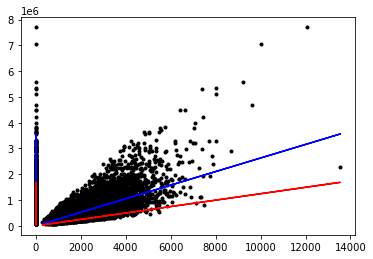

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_train_feature_matrix,train_output,'k.',
        simple_train_feature_matrix,predict_output(simple_train_feature_matrix, simple_weights_0_penalty),'b-',
        simple_train_feature_matrix,predict_output(simple_train_feature_matrix, simple_weights_high_penalty),'r-')

## Claculate error on test data

In [42]:
inital_weights = np.ones(2)
prediction_all_zeros = predict_output(simple_test_feature_matrix, inital_weights)
prediction_no_penalty = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
prediction_high_penalty = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)

RSS_all_zeros = sum((test_output - prediction_all_zeros)**2)
RSS_no_penalty = sum((test_output - prediction_no_penalty)**2)
RSS_high_penalty = sum((test_output - prediction_high_penalty)**2)
print(RSS_all_zeros, RSS_no_penalty, RSS_high_penalty)

1772834159655075.0 275723670696047.84 694640848645739.6


##  Running a multiple regression with L2 penalty

In [47]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [48]:
initial_weights = np.ones(3)
step_size = 1e-12
max_iterations = 1000

In [49]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, 
                                                             output, inital_weights=initial_weights,
                                                             setp_size=step_size, l2_penalty=0, 
                                                             max_iterations=1000)

Done with gradient descent at iteration  1
Learned weights =  [ 1.0186113  47.99222672 43.07728289]
Done with gradient descent at iteration  2
Learned weights =  [ 1.03091879 79.78467516 71.16405163]
Done with gradient descent at iteration  3
Learned weights =  [  1.03898774 101.35473687  89.84399183]
Done with gradient descent at iteration  4
Learned weights =  [  1.04420693 116.04951686 102.19944276]
Done with gradient descent at iteration  5
Learned weights =  [  1.0475103  126.11981714 110.30314799]
Done with gradient descent at iteration  6
Learned weights =  [  1.04952584 133.0792194  115.54893803]
Done with gradient descent at iteration  7
Learned weights =  [  1.05067587 137.94555388 118.87410138]
Done with gradient descent at iteration  8
Learned weights =  [  1.05124437 141.40327765 120.90892019]
Done with gradient descent at iteration  9
Learned weights =  [  1.05142232 143.91266745 122.07722708]
Done with gradient descent at iteration  10
Learned weights =  [  1.05133812 14

Done with gradient descent at iteration  91
Learned weights =  [  1.00607787 184.73263381  85.74455887]
Done with gradient descent at iteration  92
Learned weights =  [  1.00555037 185.08012878  85.36722026]
Done with gradient descent at iteration  93
Learned weights =  [  1.0050238  185.42556255  84.99211988]
Done with gradient descent at iteration  94
Learned weights =  [  1.00449814 185.76894736  84.61924442]
Done with gradient descent at iteration  95
Learned weights =  [  1.0039734  186.11029535  84.24858071]
Done with gradient descent at iteration  96
Learned weights =  [  1.00344957 186.44961862  83.88011562]
Done with gradient descent at iteration  97
Learned weights =  [  1.00292664 186.78692916  83.5138361 ]
Done with gradient descent at iteration  98
Learned weights =  [  1.0024046  187.12223892  83.1497292 ]
Done with gradient descent at iteration  99
Learned weights =  [  1.00188346 187.45555977  82.78778203]
Done with gradient descent at iteration  100
Learned weights =  

Done with gradient descent at iteration  174
Learned weights =  [  0.96499252 207.56214827  60.95439817]
Done with gradient descent at iteration  175
Learned weights =  [  0.96452577 207.77422828  60.72410432]
Done with gradient descent at iteration  176
Learned weights =  [  0.96405958 207.98505033  60.49517648]
Done with gradient descent at iteration  177
Learned weights =  [  0.96359394 208.19462186  60.26760654]
Done with gradient descent at iteration  178
Learned weights =  [  0.96312887 208.40295031  60.04138645]
Done with gradient descent at iteration  179
Learned weights =  [  0.96266435 208.61004305  59.81650821]
Done with gradient descent at iteration  180
Learned weights =  [  0.96220039 208.8159074   59.59296384]
Done with gradient descent at iteration  181
Learned weights =  [  0.96173697 209.02055064  59.37074545]
Done with gradient descent at iteration  182
Learned weights =  [  0.96127409 209.22398004  59.14984516]
Done with gradient descent at iteration  183
Learned we

Done with gradient descent at iteration  258
Learned weights =  [  0.92746819 221.62468774  45.68414404]
Done with gradient descent at iteration  259
Learned weights =  [  0.92703885 221.75335476  45.54442691]
Done with gradient descent at iteration  260
Learned weights =  [  0.92660985 221.88125859  45.40553853]
Done with gradient descent at iteration  261
Learned weights =  [  0.9261812  222.00840374  45.26747398]
Done with gradient descent at iteration  262
Learned weights =  [  0.92575288 222.13479472  45.13022836]
Done with gradient descent at iteration  263
Learned weights =  [  0.9253249  222.26043601  44.99379683]
Done with gradient descent at iteration  264
Learned weights =  [  0.92489725 222.38533204  44.85817456]
Done with gradient descent at iteration  265
Learned weights =  [  0.92446994 222.50948724  44.72335674]
Done with gradient descent at iteration  266
Learned weights =  [  0.92404295 222.63290601  44.5893386 ]
Done with gradient descent at iteration  267
Learned we

Done with gradient descent at iteration  341
Learned weights =  [  0.89283173 230.07777613  36.50509556]
Done with gradient descent at iteration  342
Learned weights =  [  0.89242489 230.15630304  36.41982472]
Done with gradient descent at iteration  343
Learned weights =  [  0.89201825 230.23436416  36.33505967]
Done with gradient descent at iteration  344
Learned weights =  [  0.89161182 230.31196225  36.25079741]
Done with gradient descent at iteration  345
Learned weights =  [  0.8912056  230.38910006  36.16703496]
Done with gradient descent at iteration  346
Learned weights =  [  0.89079958 230.46578033  36.08376936]
Done with gradient descent at iteration  347
Learned weights =  [  0.89039376 230.54200576  36.00099765]
Done with gradient descent at iteration  348
Learned weights =  [  0.88998815 230.61777905  35.91871691]
Done with gradient descent at iteration  349
Learned weights =  [  0.88958274 230.69310289  35.83692423]
Done with gradient descent at iteration  350
Learned we

Done with gradient descent at iteration  421
Learned weights =  [  0.86085306 235.09128926  31.06102184]
Done with gradient descent at iteration  422
Learned weights =  [  0.86045955 235.14007814  31.008043  ]
Done with gradient descent at iteration  423
Learned weights =  [  0.86006617 235.18857763  30.95537841]
Done with gradient descent at iteration  424
Learned weights =  [  0.85967292 235.23678944  30.90302621]
Done with gradient descent at iteration  425
Learned weights =  [  0.8592798  235.28471528  30.85098453]
Done with gradient descent at iteration  426
Learned weights =  [  0.85888681 235.33235684  30.79925155]
Done with gradient descent at iteration  427
Learned weights =  [  0.85849395 235.37971582  30.74782543]
Done with gradient descent at iteration  428
Learned weights =  [  0.85810121 235.42679388  30.69670435]
Done with gradient descent at iteration  429
Learned weights =  [  0.85770859 235.47359269  30.64588649]
Done with gradient descent at iteration  430
Learned we

Done with gradient descent at iteration  507
Learned weights =  [  0.82741594 238.38539239  27.48402666]
Done with gradient descent at iteration  508
Learned weights =  [  0.8270312  238.41464206  27.45226512]
Done with gradient descent at iteration  509
Learned weights =  [  0.82664653 238.44371823  27.42069197]
Done with gradient descent at iteration  510
Learned weights =  [  0.82626194 238.47262194  27.3893061 ]
Done with gradient descent at iteration  511
Learned weights =  [  0.82587743 238.5013542   27.35810641]
Done with gradient descent at iteration  512
Learned weights =  [  0.825493   238.52991604  27.32709177]
Done with gradient descent at iteration  513
Learned weights =  [  0.82510864 238.55830846  27.2962611 ]
Done with gradient descent at iteration  514
Learned weights =  [  0.82472436 238.58653246  27.26561331]
Done with gradient descent at iteration  515
Learned weights =  [  0.82434015 238.61458906  27.23514731]
Done with gradient descent at iteration  516
Learned we

Done with gradient descent at iteration  597
Learned weights =  [  0.79305293 240.42977774  25.26407906]
Done with gradient descent at iteration  598
Learned weights =  [  0.79267363 240.44690099  25.24548539]
Done with gradient descent at iteration  599
Learned weights =  [  0.79229437 240.46392268  25.227002  ]
Done with gradient descent at iteration  600
Learned weights =  [  0.79191516 240.4808434   25.20862825]
Done with gradient descent at iteration  601
Learned weights =  [  0.79153599 240.49766375  25.19036349]
Done with gradient descent at iteration  602
Learned weights =  [  0.79115687 240.51438433  25.17220707]
Done with gradient descent at iteration  603
Learned weights =  [  0.79077779 240.53100573  25.15415835]
Done with gradient descent at iteration  604
Learned weights =  [  0.79039876 240.54752854  25.13621668]
Done with gradient descent at iteration  605
Learned weights =  [  0.79001977 240.56395335  25.11838144]
Done with gradient descent at iteration  606
Learned we

Done with gradient descent at iteration  682
Learned weights =  [  0.76095113 241.57556993  24.01989739]
Done with gradient descent at iteration  683
Learned weights =  [  0.76057488 241.58589683  24.00868375]
Done with gradient descent at iteration  684
Learned weights =  [  0.76019865 241.59616248  23.99753663]
Done with gradient descent at iteration  685
Learned weights =  [  0.75982245 241.60636724  23.98645563]
Done with gradient descent at iteration  686
Learned weights =  [  0.75944628 241.61651147  23.97544036]
Done with gradient descent at iteration  687
Learned weights =  [  0.75907013 241.62659552  23.96449042]
Done with gradient descent at iteration  688
Learned weights =  [  0.75869402 241.63661976  23.95360544]
Done with gradient descent at iteration  689
Learned weights =  [  0.75831792 241.64658455  23.94278502]
Done with gradient descent at iteration  690
Learned weights =  [  0.75794186 241.65649022  23.93202879]
Done with gradient descent at iteration  691
Learned we

Done with gradient descent at iteration  767
Learned weights =  [  0.72905334 242.2665886   23.26954641]
Done with gradient descent at iteration  768
Learned weights =  [  0.72867892 242.27281668  23.26278362]
Done with gradient descent at iteration  769
Learned weights =  [  0.72830452 242.27900781  23.25606094]
Done with gradient descent at iteration  770
Learned weights =  [  0.72793014 242.28516223  23.24937813]
Done with gradient descent at iteration  771
Learned weights =  [  0.72755578 242.29128014  23.24273497]
Done with gradient descent at iteration  772
Learned weights =  [  0.72718143 242.29736175  23.23613121]
Done with gradient descent at iteration  773
Learned weights =  [  0.72680709 242.3034073   23.22956663]
Done with gradient descent at iteration  774
Learned weights =  [  0.72643278 242.30941699  23.22304098]
Done with gradient descent at iteration  775
Learned weights =  [  0.72605847 242.31539103  23.21655404]
Done with gradient descent at iteration  776
Learned we

Done with gradient descent at iteration  849
Learned weights =  [  0.69839856 242.67193353  22.8294031 ]
Done with gradient descent at iteration  850
Learned weights =  [  0.69802523 242.67575728  22.82525112]
Done with gradient descent at iteration  851
Learned weights =  [  0.6976519  242.67955834  22.82112378]
Done with gradient descent at iteration  852
Learned weights =  [  0.69727858 242.68333687  22.81702091]
Done with gradient descent at iteration  853
Learned weights =  [  0.69690528 242.68709297  22.81294239]
Done with gradient descent at iteration  854
Learned weights =  [  0.69653198 242.6908268   22.80888806]
Done with gradient descent at iteration  855
Learned weights =  [  0.6961587  242.69453849  22.80485777]
Done with gradient descent at iteration  856
Learned weights =  [  0.69578542 242.69822815  22.80085139]
Done with gradient descent at iteration  857
Learned weights =  [  0.69541215 242.70189593  22.79686878]
Done with gradient descent at iteration  858
Learned we

Done with gradient descent at iteration  936
Learned weights =  [  0.66595068 242.93239597  22.54658601]
Done with gradient descent at iteration  937
Learned weights =  [  0.66557804 242.93467477  22.54411167]
Done with gradient descent at iteration  938
Learned weights =  [  0.6652054  242.93694005  22.54165201]
Done with gradient descent at iteration  939
Learned weights =  [  0.66483277 242.9391919   22.53920693]
Done with gradient descent at iteration  940
Learned weights =  [  0.66446015 242.94143039  22.53677636]
Done with gradient descent at iteration  941
Learned weights =  [  0.66408753 242.9436556   22.53436021]
Done with gradient descent at iteration  942
Learned weights =  [  0.66371491 242.94586761  22.53195839]
Done with gradient descent at iteration  943
Learned weights =  [  0.66334231 242.9480665   22.52957082]
Done with gradient descent at iteration  944
Learned weights =  [  0.6629697  242.95025235  22.52719741]
Done with gradient descent at iteration  945
Learned we

In [50]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, 
                                                             output, inital_weights=initial_weights,
                                                             setp_size=step_size, l2_penalty=1e11, 
                                                             max_iterations=1000)

Done with gradient descent at iteration  1
Learned weights =  [ 1.0186113  47.79222672 42.87728289]
Done with gradient descent at iteration  2
Learned weights =  [ 1.03094706 70.09427275 62.45135027]
Done with gradient descent at iteration  3
Learned weights =  [ 1.04031841 80.78561077 71.53154388]
Done with gradient descent at iteration  4
Learned weights =  [ 1.04828959 85.95953215 75.68834888]
Done with gradient descent at iteration  5
Learned weights =  [ 1.05559958 88.50142758 77.54648351]
Done with gradient descent at iteration  6
Learned weights =  [ 1.06259744 89.77973263 78.34037315]
Done with gradient descent at iteration  7
Learned weights =  [ 1.06944804 90.44511034 78.6487485 ]
Done with gradient descent at iteration  8
Learned weights =  [ 1.07622923 90.80825387 78.74147439]
Done with gradient descent at iteration  9
Learned weights =  [ 1.08297775 91.01855851 78.7432224 ]
Done with gradient descent at iteration  10
Learned weights =  [ 1.08971094 91.14867625 78.71064862]

Done with gradient descent at iteration  92
Learned weights =  [ 1.64077703 91.48995464 78.43727551]
Done with gradient descent at iteration  93
Learned weights =  [ 1.64749724 91.48995375 78.43727461]
Done with gradient descent at iteration  94
Learned weights =  [ 1.65421745 91.48995285 78.4372737 ]
Done with gradient descent at iteration  95
Learned weights =  [ 1.66093766 91.48995195 78.43727279]
Done with gradient descent at iteration  96
Learned weights =  [ 1.66765786 91.48995106 78.43727189]
Done with gradient descent at iteration  97
Learned weights =  [ 1.67437807 91.48995016 78.43727098]
Done with gradient descent at iteration  98
Learned weights =  [ 1.68109828 91.48994926 78.43727007]
Done with gradient descent at iteration  99
Learned weights =  [ 1.68781848 91.48994837 78.43726917]
Done with gradient descent at iteration  100
Learned weights =  [ 1.69453869 91.48994747 78.43726826]
Done with gradient descent at iteration  101
Learned weights =  [ 1.7012589  91.48994657 7

Done with gradient descent at iteration  174
Learned weights =  [ 2.19183369 91.48988109 78.43720122]
Done with gradient descent at iteration  175
Learned weights =  [ 2.19855389 91.4898802  78.43720031]
Done with gradient descent at iteration  176
Learned weights =  [ 2.20527409 91.4898793  78.43719941]
Done with gradient descent at iteration  177
Learned weights =  [ 2.21199429 91.4898784  78.4371985 ]
Done with gradient descent at iteration  178
Learned weights =  [ 2.21871449 91.48987751 78.4371976 ]
Done with gradient descent at iteration  179
Learned weights =  [ 2.22543469 91.48987661 78.43719669]
Done with gradient descent at iteration  180
Learned weights =  [ 2.23215488 91.48987571 78.43719578]
Done with gradient descent at iteration  181
Learned weights =  [ 2.23887508 91.48987482 78.43719488]
Done with gradient descent at iteration  182
Learned weights =  [ 2.24559528 91.48987392 78.43719397]
Done with gradient descent at iteration  183
Learned weights =  [ 2.25231548 91.48

Done with gradient descent at iteration  263
Learned weights =  [ 2.78993097 91.48980127 78.43712059]
Done with gradient descent at iteration  264
Learned weights =  [ 2.79665115 91.48980037 78.43711968]
Done with gradient descent at iteration  265
Learned weights =  [ 2.80337134 91.48979947 78.43711878]
Done with gradient descent at iteration  266
Learned weights =  [ 2.81009153 91.48979857 78.43711787]
Done with gradient descent at iteration  267
Learned weights =  [ 2.81681172 91.48979768 78.43711696]
Done with gradient descent at iteration  268
Learned weights =  [ 2.82353191 91.48979678 78.43711606]
Done with gradient descent at iteration  269
Learned weights =  [ 2.8302521  91.48979588 78.43711515]
Done with gradient descent at iteration  270
Learned weights =  [ 2.83697229 91.48979499 78.43711425]
Done with gradient descent at iteration  271
Learned weights =  [ 2.84369248 91.48979409 78.43711334]
Done with gradient descent at iteration  272
Learned weights =  [ 2.85041267 91.48

Done with gradient descent at iteration  355
Learned weights =  [ 3.40818794 91.48971875 78.43703724]
Done with gradient descent at iteration  356
Learned weights =  [ 3.41490812 91.48971785 78.43703633]
Done with gradient descent at iteration  357
Learned weights =  [ 3.42162829 91.48971695 78.43703543]
Done with gradient descent at iteration  358
Learned weights =  [ 3.42834847 91.48971605 78.43703452]
Done with gradient descent at iteration  359
Learned weights =  [ 3.43506865 91.48971516 78.43703361]
Done with gradient descent at iteration  360
Learned weights =  [ 3.44178883 91.48971426 78.43703271]
Done with gradient descent at iteration  361
Learned weights =  [ 3.44850901 91.48971336 78.4370318 ]
Done with gradient descent at iteration  362
Learned weights =  [ 3.45522919 91.48971247 78.4370309 ]
Done with gradient descent at iteration  363
Learned weights =  [ 3.46194937 91.48971157 78.43702999]
Done with gradient descent at iteration  364
Learned weights =  [ 3.46866955 91.48

Done with gradient descent at iteration  437
Learned weights =  [ 3.9592423  91.4896452  78.43696295]
Done with gradient descent at iteration  438
Learned weights =  [ 3.96596247 91.4896443  78.43696204]
Done with gradient descent at iteration  439
Learned weights =  [ 3.97268265 91.4896434  78.43696114]
Done with gradient descent at iteration  440
Learned weights =  [ 3.97940282 91.4896425  78.43696023]
Done with gradient descent at iteration  441
Learned weights =  [ 3.98612299 91.48964161 78.43695932]
Done with gradient descent at iteration  442
Learned weights =  [ 3.99284316 91.48964071 78.43695842]
Done with gradient descent at iteration  443
Learned weights =  [ 3.99956333 91.48963981 78.43695751]
Done with gradient descent at iteration  444
Learned weights =  [ 4.0062835  91.48963892 78.43695661]
Done with gradient descent at iteration  445
Learned weights =  [ 4.01300367 91.48963802 78.4369557 ]
Done with gradient descent at iteration  446
Learned weights =  [ 4.01972384 91.48

Done with gradient descent at iteration  527
Learned weights =  [ 4.56405725 91.48956447 78.43688141]
Done with gradient descent at iteration  528
Learned weights =  [ 4.57077741 91.48956357 78.4368805 ]
Done with gradient descent at iteration  529
Learned weights =  [ 4.57749757 91.48956268 78.4368796 ]
Done with gradient descent at iteration  530
Learned weights =  [ 4.58421773 91.48956178 78.43687869]
Done with gradient descent at iteration  531
Learned weights =  [ 4.5909379  91.48956088 78.43687779]
Done with gradient descent at iteration  532
Learned weights =  [ 4.59765806 91.48955998 78.43687688]
Done with gradient descent at iteration  533
Learned weights =  [ 4.60437822 91.48955909 78.43687597]
Done with gradient descent at iteration  534
Learned weights =  [ 4.61109838 91.48955819 78.43687507]
Done with gradient descent at iteration  535
Learned weights =  [ 4.61781854 91.48955729 78.43687416]
Done with gradient descent at iteration  536
Learned weights =  [ 4.6245387  91.48

Done with gradient descent at iteration  611
Learned weights =  [ 5.12855043 91.48948913 78.43680531]
Done with gradient descent at iteration  612
Learned weights =  [ 5.13527058 91.48948823 78.4368044 ]
Done with gradient descent at iteration  613
Learned weights =  [ 5.14199073 91.48948733 78.4368035 ]
Done with gradient descent at iteration  614
Learned weights =  [ 5.14871088 91.48948643 78.43680259]
Done with gradient descent at iteration  615
Learned weights =  [ 5.15543103 91.48948554 78.43680169]
Done with gradient descent at iteration  616
Learned weights =  [ 5.16215119 91.48948464 78.43680078]
Done with gradient descent at iteration  617
Learned weights =  [ 5.16887134 91.48948374 78.43679987]
Done with gradient descent at iteration  618
Learned weights =  [ 5.17559149 91.48948285 78.43679897]
Done with gradient descent at iteration  619
Learned weights =  [ 5.18231164 91.48948195 78.43679806]
Done with gradient descent at iteration  620
Learned weights =  [ 5.18903179 91.48

Done with gradient descent at iteration  701
Learned weights =  [ 5.73336371 91.4894084  78.43672377]
Done with gradient descent at iteration  702
Learned weights =  [ 5.74008385 91.4894075  78.43672287]
Done with gradient descent at iteration  703
Learned weights =  [ 5.746804   91.48940661 78.43672196]
Done with gradient descent at iteration  704
Learned weights =  [ 5.75352414 91.48940571 78.43672105]
Done with gradient descent at iteration  705
Learned weights =  [ 5.76024428 91.48940481 78.43672015]
Done with gradient descent at iteration  706
Learned weights =  [ 5.76696442 91.48940392 78.43671924]
Done with gradient descent at iteration  707
Learned weights =  [ 5.77368457 91.48940302 78.43671834]
Done with gradient descent at iteration  708
Learned weights =  [ 5.78040471 91.48940212 78.43671743]
Done with gradient descent at iteration  709
Learned weights =  [ 5.78712485 91.48940122 78.43671652]
Done with gradient descent at iteration  710
Learned weights =  [ 5.79384499 91.48

Done with gradient descent at iteration  786
Learned weights =  [ 6.30457547 91.48933216 78.43664676]
Done with gradient descent at iteration  787
Learned weights =  [ 6.3112956  91.48933126 78.43664586]
Done with gradient descent at iteration  788
Learned weights =  [ 6.31801573 91.48933037 78.43664495]
Done with gradient descent at iteration  789
Learned weights =  [ 6.32473587 91.48932947 78.43664405]
Done with gradient descent at iteration  790
Learned weights =  [ 6.331456   91.48932857 78.43664314]
Done with gradient descent at iteration  791
Learned weights =  [ 6.33817613 91.48932768 78.43664223]
Done with gradient descent at iteration  792
Learned weights =  [ 6.34489627 91.48932678 78.43664133]
Done with gradient descent at iteration  793
Learned weights =  [ 6.3516164  91.48932588 78.43664042]
Done with gradient descent at iteration  794
Learned weights =  [ 6.35833653 91.48932498 78.43663952]
Done with gradient descent at iteration  795
Learned weights =  [ 6.36505667 91.48

Done with gradient descent at iteration  868
Learned weights =  [ 6.85562608 91.48925861 78.43657248]
Done with gradient descent at iteration  869
Learned weights =  [ 6.86234621 91.48925771 78.43657157]
Done with gradient descent at iteration  870
Learned weights =  [ 6.86906633 91.48925682 78.43657066]
Done with gradient descent at iteration  871
Learned weights =  [ 6.87578645 91.48925592 78.43656976]
Done with gradient descent at iteration  872
Learned weights =  [ 6.88250658 91.48925502 78.43656885]
Done with gradient descent at iteration  873
Learned weights =  [ 6.8892267  91.48925413 78.43656795]
Done with gradient descent at iteration  874
Learned weights =  [ 6.89594683 91.48925323 78.43656704]
Done with gradient descent at iteration  875
Learned weights =  [ 6.90266695 91.48925233 78.43656613]
Done with gradient descent at iteration  876
Learned weights =  [ 6.90938708 91.48925143 78.43656523]
Done with gradient descent at iteration  877
Learned weights =  [ 6.9161072  91.48

Done with gradient descent at iteration  951
Learned weights =  [ 7.4133961  91.48918416 78.43649728]
Done with gradient descent at iteration  952
Learned weights =  [ 7.42011621 91.48918327 78.43649637]
Done with gradient descent at iteration  953
Learned weights =  [ 7.42683633 91.48918237 78.43649547]
Done with gradient descent at iteration  954
Learned weights =  [ 7.43355644 91.48918147 78.43649456]
Done with gradient descent at iteration  955
Learned weights =  [ 7.44027656 91.48918058 78.43649366]
Done with gradient descent at iteration  956
Learned weights =  [ 7.44699668 91.48917968 78.43649275]
Done with gradient descent at iteration  957
Learned weights =  [ 7.45371679 91.48917878 78.43649184]
Done with gradient descent at iteration  958
Learned weights =  [ 7.46043691 91.48917789 78.43649094]
Done with gradient descent at iteration  959
Learned weights =  [ 7.46715702 91.48917699 78.43649003]
Done with gradient descent at iteration  960
Learned weights =  [ 7.47387714 91.48

In [51]:
inital_weights = np.ones(3)
multiple_prediction_all_zeros = predict_output(test_feature_matrix, inital_weights)
multiple_prediction_no_penalty = predict_output(test_feature_matrix, multiple_weights_0_penalty)
multiple_prediction_high_penalty = predict_output(test_feature_matrix, multiple_weights_high_penalty)

multiple_RSS_all_zeros = sum((test_output - multiple_prediction_all_zeros)**2)
multiple_RSS_no_penalty = sum((test_output - multiple_prediction_no_penalty)**2)
multiple_RSS_high_penalty = sum((test_output - multiple_prediction_high_penalty)**2)
print(multiple_RSS_all_zeros, multiple_RSS_no_penalty, multiple_RSS_high_penalty)

1762538419109621.0 274067693220835.97 500404246871243.5


## Test error of the first observation

In [53]:
error1 = (test_output - multiple_prediction_no_penalty)[0]
error1

-77465.73529944709

In [54]:
error1_penalty = (test_output - multiple_prediction_high_penalty)[0]
error1_penalty

39545.90067311947